In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as s
import scipy.stats as ss

In [2]:
data=pd.read_csv(r"C:\Users\seeth\python 232\Statistics\cleaned data of autos.csv")

In [3]:
df=data.copy()

In [4]:
df

,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,registration_year,gearbox,power_ps,model,odometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,postal_code,last_seen
0,2016-03-24,Golf_3_1.6,privat,Angebot,480,test,not mentioned,1993,manuell,0,golf,150000,0,benzin,volkswagen,unknown,2016-03-24,70435,2016-04-07
1,2016-03-24,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,golf,125000,5,diesel,audi,ja,2016-03-24,66954,2016-04-07
2,2016-03-14,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,unknown,2016-03-14,90480,2016-04-05
3,2016-03-17,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17,91074,2016-03-17
4,2016-03-31,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31,60437,2016-04-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371523,2016-03-14,Suche_t4___vito_ab_6_sitze,privat,Angebot,2200,test,not mentioned,2005,manuell,0,golf,20000,1,unknown,sonstige_autos,unknown,2016-03-14,39576,2016-04-06
371524,2016-03-05,Smart_smart_leistungssteigerung_100ps,privat,Angebot,1199,test,cabrio,2000,automatik,101,fortwo,125000,3,benzin,smart,nein,2016-03-05,26135,2016-03-11
371525,2016-03-19,Volkswagen_Multivan_T4_TDI_7DC_UY2,privat,Angebot,9200,test,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen,nein,2016-03-19,87439,2016-04-07
371526,2016-03-20,VW_Golf_Kombi_1_9l_TDI,privat,Angebot,3400,test,kombi,2002,manuell,100,golf,150000,6,diesel,volkswagen,unknown,2016-03-20,40764,2016-03-24


### 1) Can you tell me No of Vehicles by Brand Available on ebay for sale with the help of visualization

In [34]:
df["brand"].value_counts()

volkswagen        79640
bmw               40274
opel              40136
mercedes_benz     35309
audi              32873
ford              25573
renault           17969
peugeot           11027
fiat               9676
seat               7022
mazda              5695
skoda              5641
smart              5249
citroen            5182
nissan             5037
toyota             4694
sonstige_autos     3982
hyundai            3646
mini               3394
volvo              3327
mitsubishi         3061
honda              2836
kia                2555
alfa_romeo         2345
suzuki             2328
porsche            2215
chevrolet          1845
chrysler           1452
dacia               900
jeep                807
daihatsu            806
subaru              779
land_rover          770
jaguar              621
trabant             591
daewoo              542
saab                530
rover               490
lancia              484
lada                225
Name: brand, dtype: int64

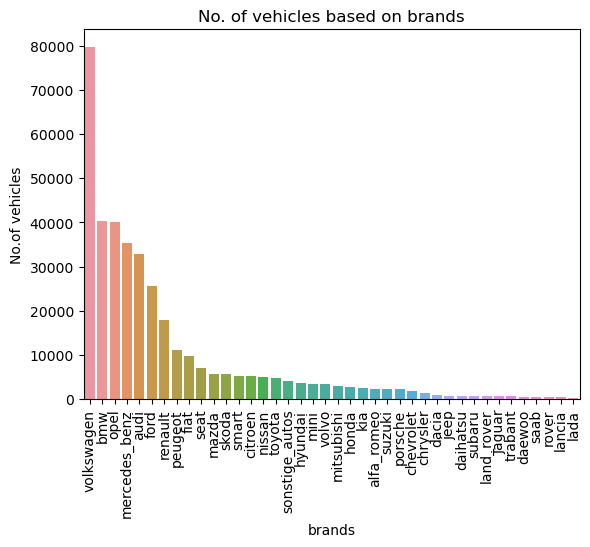

In [70]:
sns.barplot(data=df,x=df["brand"].value_counts().index,y=df["brand"].value_counts())
plt.xticks(rotation=90)
plt.title("No. of vehicles based on brands")
plt.xlabel("brands")
plt.ylabel("No.of vehicles")
plt.show()

### 2) What is the Average price for vehicles based on the type of vehicle as well as on the type of gearbox.Explain me with both numerical and visualization analysis


In [98]:
b=df.groupby("gearbox")[["price"]].mean()
avg_price_of_gearbox=b.reset_index()
avg_price_of_gearbox

,gearbox,price
0,automatik,15146.603061
1,manuell,17857.812189


In [99]:
c=df.groupby("vehicle_type")[["price"]].mean()
avg_price_of_vehicle=c.reset_index()
avg_price_of_vehicle

,vehicle_type,price
0,andere,677328.957700
1,bus,10302.742956
2,cabrio,15066.444013
3,coupe,25961.682040
4,kleinwagen,5694.229134
5,kombi,7741.217409
6,limousine,11116.186404
7,not mentioned,20137.725263
8,suv,13242.822397


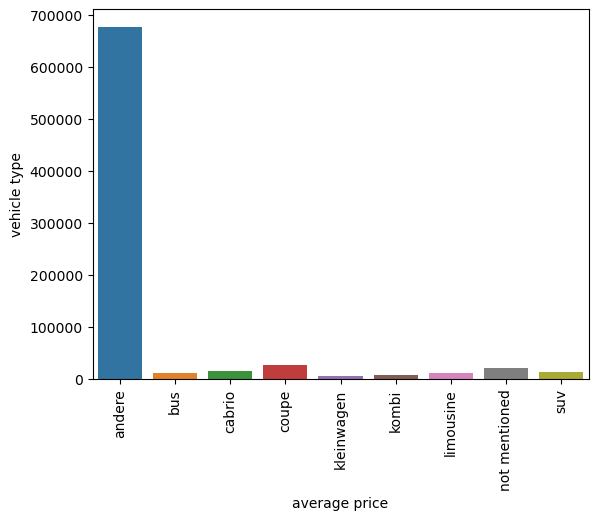

In [108]:
sns.barplot(data=avg_price_of_vehicle,x="vehicle_type",y="price")
plt.xlabel("average price")
plt.ylabel("vehicle type")
plt.xticks(rotation=90)
plt.show()

In [121]:
avg_price_of_gearbox

,gearbox,price
0,automatik,15146.603061
1,manuell,17857.812189


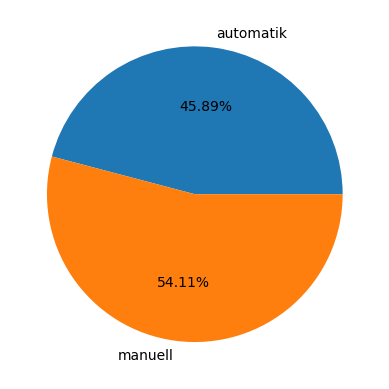

In [122]:
plt.pie(avg_price_of_gearbox.price, labels=avg_price_of_gearbox.gearbox,autopct='%1.2f%%')
plt.show()

### 3) What is the marginal probability of private seller


In [116]:
pro_private_seller=df["seller"].value_counts()[0]
pro_private_seller

371525

In [117]:
total=df["seller"].count()
total

371528

In [120]:
marginal_pro=pro_private_seller/total
marginal_pro

0.9999919252384746